# Machine Learning

*Лектор: Елена Кантонистова*

*Факультет экономических наук НИУ ВШЭ, 2018-19 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(ФЭН))

## Домашнее задание №1
### Часть 1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 7)

import re
import itertools

In [35]:
df = pd.read_csv('adult.data.txt', header=None, 
                names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
                       "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", 
                       "native-country", "50K"],
                skipinitialspace=True)

In [36]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Вопрос 1
Сколько жителей США и Кубы в выборке?

*Найдем длину датафрейма, в котором находятся только наблюдения для жителей США и Кубы.*

In [37]:
len(df[(df['native-country'] == 'United-States') | (df['native-country'] == 'Cuba')])

29265

### Вопрос 2
Каков средний возраст женщин проживающих в США?


*Посчитаем среднее по столбцу возраста в датафрейме, в котором есть наблюдения только для жителей США.*

In [38]:
df[(df['native-country'] == 'United-States')]['age'].mean()

38.65567363729859

### Вопрос 3
Какова доля граждан женщин на Кубе согласно выборке?

*Поделим длину датафрейма, где содержатся данные только о женщинах из кубы, на длину датафрейма с наблюдениями для всех жителей Кубы. *

In [39]:
len(df[(df['native-country'] == 'Cuba') & (df['sex'] == 'Female')])/len(df[df['native-country'] == 'Cuba'])

0.42105263157894735

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

*Воспользуемся методом .value_counts() для расчета частоты встречаний всех уровней образования, а затем построим с помощью него bar plot. *

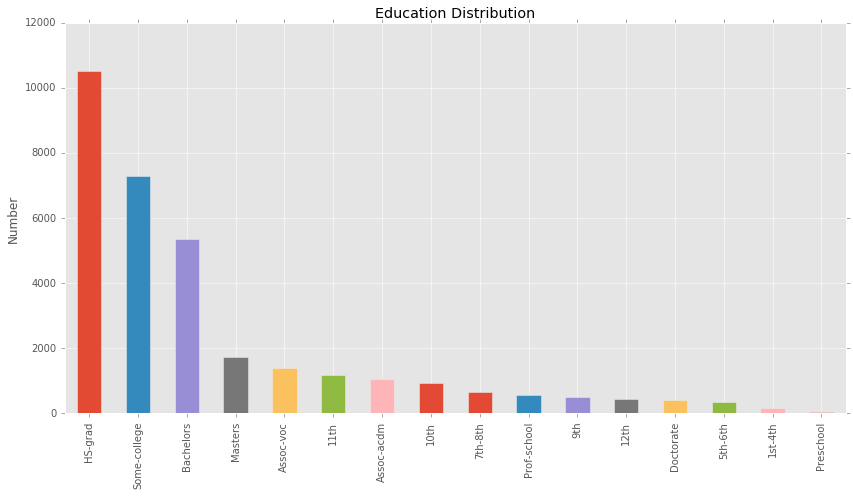

In [40]:
df['education'].value_counts().plot(kind='bar', title='Education Distribution', figsize=(14, 7))
plt.ylabel("Number")

### Вопрос 5
Найти среднее и стандартное отклонение переменной "capital gain" для людей с высшим образованием?

In [41]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

*Обозначим за высшее образование бакалвариат, магистратуру и докоторнатуру.*

In [42]:
higher_education = ['Bachelors', 'Masters', 'Doctorate']

*Отфильтруем данные по education так, чтобы остались только значния из списка higher_education. Затем посчитаем среднее и стандартное отклонения по столбцу capital-gain нового датафрейма.*

In [43]:
print('Среднее =', 
      df[df['education'].isin(higher_education)]['capital-gain'].mean())
print('Стандартное отклонение =', 
      df[df['education'].isin(higher_education)]['capital-gain'].std())

Среднее = 2107.9096248831934
Стандартное отклонение = 10266.477105631906


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

*Поделим длину датафрейма, где содержатся данные только о людях с доходом больше 50 тысяч и высшим образованием, на длину датафрейма с наблюдениями только о людях с доходом больше 50 тысяч.
Так как признак наличия высшего образования бинарный, чтобы ответить на вопрос, проверим, является ли доля людей с доходом больше 50 тысяч и высшим образованием больше 0.5. *

In [44]:
(len(df[(df['capital-gain'] > 50000) & (df['education'].isin(higher_education))])/len(df[df['capital-gain'] > 50000])) > 0.5

False

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой представленной страны?

In [45]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

*Создадим два списка:    
1) male_max_ages - для подсчета максимального возраста мужчин для каждой страны    
2) female_max_ages - для подсчета максимального возраста женщин для каждой страны*

In [46]:
male_max_ages = []
female_max_ages = []

for country in df['native-country'].unique(): # проходим циклом по всем странам
    cur_df = df[df['native-country'] == country] # создаем датафрейм с наблюдениями только для выбранной страны
    male_max_ages.append(cur_df[cur_df['sex'] == 'Male']['age'].max()) # сохраняем максимальный возраст мужчины...
    female_max_ages.append(cur_df[cur_df['sex'] == 'Female']['age'].max()) #...и женщины
    
age_country_table = pd.DataFrame(data={'Country': df['native-country'].unique(), 
                                       'MaleMaxAge': male_max_ages, 'FemaleMaxAge': female_max_ages})
# создаем датафрейм с колонками: страна, максимальный возраст мужчин, максимальный возраст женщин

In [47]:
age_country_table

,Country,FemaleMaxAge,MaleMaxAge
0,United-States,90,90.0
1,Cuba,72,82.0
2,Jamaica,65,66.0
3,India,52,61.0
4,?,81,90.0
5,Mexico,61,81.0
6,South,53,90.0
7,Puerto-Rico,90,61.0
8,Honduras,58,47.0
9,England,90,73.0


### Вопрос 8
Постройте scatter plot по переменным 'age' и 'fnlwgt'

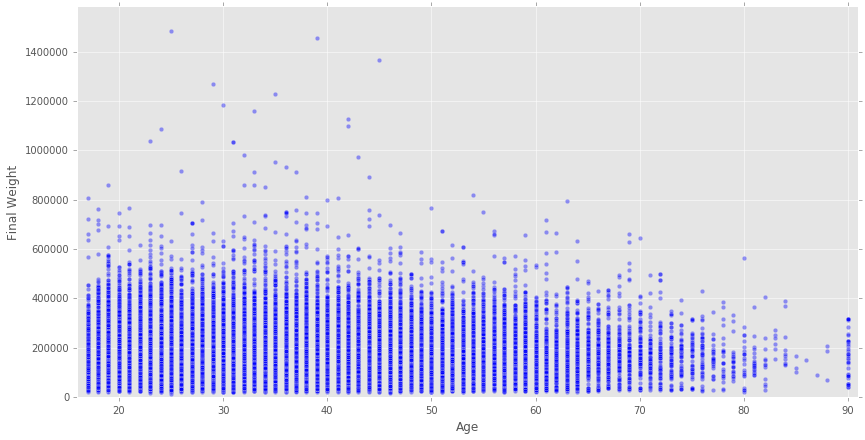

In [48]:
plt.scatter(df['age'], df['fnlwgt'], alpha=0.4)

plt.ylim(0, df['fnlwgt'].max()+10**5)
plt.xlim(df['age'].min()-1, df['age'].max()+1)
plt.xlabel('Age')
plt.ylabel('Final Weight')

### Часть 2
В данной части воспользуйетесь библиотекой numpy для решения задач линейной алгербы. Циклами в данной части пользоваться нельзя, так как код, написанный на numpy без использования циклов, позволит вам проводить вычисления гораздо быстрее.

0. Зафиксируйте генератор случайных чисел с помощью функции np.random.seed(). Данный пункт позволит вам при каждом запуске получать одинаковые результаты.
1. Сгенерируйте матрицу размера 1000x10, где каждый элемент рампределен нормально с мат. ожиданием 2 и дисперсией 3.
2. Найдите svd разложение полученной матрицы.
3. Найдите svd разложение матрицы с помощью алгоритма рассказанного на семинаре. (Вам может пригодиться функция np.linalg.eig)
4. Сравните полученные результаты
5. Найдите количество строк, в которых все элементы меньше 0.
6. Нарисуйте распределение среднего значения по строкам.

*Часть кода взята с https://stackoverflow.com/questions/27781872/eigenvectors-computed-with-numpys-eigh-and-svd-do-not-match *

#### 1

In [49]:
np.random.seed(26)

#### 2

In [60]:
mu, sigma = 2, 3**(1/2) # mean and standard deviation
s = np.random.normal(mu, sigma, 1000*10)

In [61]:
matr = np.matrix(s).reshape((1000, 10))

In [62]:
matr

matrix([[ 1.37465724,  2.77520238,  2.08781812, ...,  7.54691942,
          2.58597203,  2.73858503],
        [ 4.83446635,  0.28978589,  3.71963874, ...,  3.88527307,
          2.72084034,  0.69419115],
        [ 0.52719757,  3.01842891,  2.64087395, ...,  1.64887051,
          0.99480624,  2.84137182],
        ...,
        [ 3.80733125, -0.96997686,  3.70817887, ...,  2.63206315,
          0.66988689,  2.10150422],
        [ 3.0655817 ,  2.09826312,  2.48401728, ...,  1.01543584,
          1.21005734,  2.84000592],
        [ 3.10128858,  2.40811278,  2.13770996, ...,  0.83757232,
          3.02446248,  2.57091436]])

#### 3

In [63]:
U, Sigma, VT = np.linalg.svd(matr, full_matrices=True)
U.shape, Sigma.shape, VT.shape

((1000, 1000), (10,), (10, 10))

In [64]:
U, Sigma, VT

(matrix([[-0.04890231,  0.00549242,  0.03289442, ..., -0.04608051,
          -0.03507001, -0.03154442],
         [-0.03666008, -0.02721367, -0.01853968, ..., -0.0544176 ,
           0.00105769,  0.00640873],
         [-0.03104494,  0.01200374,  0.03168806, ..., -0.04257958,
          -0.01922864, -0.00584643],
         ...,
         [-0.04592816,  0.06157177, -0.04257571, ...,  0.98152728,
          -0.00359828,  0.00433753],
         [-0.03723359,  0.04637169,  0.01086984, ..., -0.00308161,
           0.99135357, -0.0031521 ],
         [-0.02537782, -0.01547407,  0.01128133, ...,  0.00434216,
          -0.00318288,  0.99422956]]),
 array([207.85356261,  57.85800118,  57.04325625,  55.44848895,
         54.3354695 ,  53.20917938,  52.82959009,  52.07878288,
         51.69602166,  50.53668764]),
 matrix([[-3.26152304e-01, -3.23781667e-01, -3.10681808e-01,
          -3.17835521e-01, -3.08588924e-01, -3.17297668e-01,
          -3.17712318e-01, -3.08057007e-01, -3.26366028e-01,
          -

In [65]:
np.diag(Sigma)

array([[207.85356261,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  57.85800118,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  57.04325625,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  55.44848895,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         54.3354695 ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  53.20917938,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  

In [305]:
Sigma

array([207.85356261,  57.85800118,  57.04325625,  55.44848895,
        54.3354695 ,  53.20917938,  52.82959009,  52.07878288,
        51.69602166,  50.53668764])

#### 4

*Найдем собственные значения и собственные векторы матрицы $A$, где
\begin{align}
A = X^{T}X. \\
\end{align}
Собственные значения этой матрицы - элементы главной диагонали матрицы $\Sigma$ в квадрате.    
Собственые векторы - столбцы матрицы $V$ (строки матрицы $V^{T}$).*

In [341]:
A = matr.transpose()@matr

In [342]:
eig_values_v, eig_vectors_v = np.linalg.eig(A)
eig_values_v.shape, eig_vectors_v.shape

((10,), (10, 10))

In [343]:
eig_values_v # заметим, что собственные значения не отсортированы по возрастанию

array([43203.10348911,  3347.5483008 ,  3253.93308346,  3074.53492699,
        2952.34324584,  2553.95679793,  2831.21677041,  2790.96558927,
        2672.4786551 ,  2712.19962593])

In [344]:
indx=np.argsort(eig_values_v)[::-1]

In [345]:
eig_values_v = eig_values_v[indx] # сортируем
eig_vectors_v = eig_vectors_v[:, indx]

In [346]:
eig_values_v

array([43203.10348911,  3347.5483008 ,  3253.93308346,  3074.53492699,
        2952.34324584,  2831.21677041,  2790.96558927,  2712.19962593,
        2672.4786551 ,  2553.95679793])

In [347]:
eig_sigma_v = np.sqrt(eig_values_v)
eig_vectors_vt = eig_vectors_v.transpose()

In [348]:
eig_sigma_v

array([207.85356261,  57.85800118,  57.04325625,  55.44848895,
        54.3354695 ,  53.20917938,  52.82959009,  52.07878288,
        51.69602166,  50.53668764])

In [349]:
eig_vectors_v

matrix([[-3.26152304e-01, -1.11147056e-01, -8.33806679e-02,
          3.46382566e-02, -5.73001003e-01, -3.74287770e-02,
          6.18210581e-01, -2.64775809e-02, -3.97948811e-01,
          4.62510380e-02],
        [-3.23781667e-01,  9.20862014e-02,  6.28017572e-01,
         -3.98267488e-02,  1.06526357e-01, -5.08367207e-01,
         -9.19757697e-02, -4.36571670e-01, -1.02425173e-01,
          1.06597183e-01],
        [-3.10681808e-01,  4.81602151e-01, -8.75833618e-02,
          2.57339267e-01,  8.62818315e-02,  4.23411155e-01,
         -2.01485332e-01, -5.37255380e-02, -2.48356250e-01,
          5.52952691e-01],
        [-3.17835521e-01, -5.08559333e-01,  3.43848582e-01,
          9.97662618e-02, -2.72619932e-01,  4.34990431e-01,
         -1.61777974e-01, -5.78966586e-04,  4.54263964e-01,
          1.26871322e-01],
        [-3.08588924e-01, -2.91679806e-01, -3.01856279e-01,
         -1.29046596e-02, -8.16415864e-02, -4.85979202e-01,
         -4.37568597e-01,  4.63111943e-01, -1.211868

In [350]:
np.allclose(abs((eig_vt*VT).sum(0)),1.)

False

In [351]:
(abs(eig_vt)-abs(VT)).sum()

1.1007335451104772e-14

*Теперь найдем собственные значения и собственные векторы матрицы $B$, где
\begin{align}
B = XX^{T}. \\
\end{align}
Собственные значения этой матрицы - тоже элементы главной диагонали матрицы $\Sigma$ в квадрате.    
Собственые векторы - столбцы матрицы $U$.*

In [352]:
B = matr@matr.transpose()

In [359]:
eig_values_u, eig_vectors_u = np.linalg.eig(B)
indx2=np.argsort(eig_values_u)[::-1]
eig_values_u.shape, eig_vectors_u.shape

((1000,), (1000, 1000))

In [360]:
eig_values_u = eig_values_u[indx2]
eig_vectors_u = eig_vectors_u[indx2, :]

In [361]:
eig_values_u

array([ 4.32031035e+04+0.00000000e+00j,  3.34754830e+03+0.00000000e+00j,
        3.25393308e+03+0.00000000e+00j,  3.07453493e+03+0.00000000e+00j,
        2.95234325e+03+0.00000000e+00j,  2.83121677e+03+0.00000000e+00j,
        2.79096559e+03+0.00000000e+00j,  2.71219963e+03+0.00000000e+00j,
        2.67247866e+03+0.00000000e+00j,  2.55395680e+03+0.00000000e+00j,
        2.97625245e-12+8.75542656e-13j,  2.97625245e-12-8.75542656e-13j,
        2.61823153e-12+6.32035664e-12j,  2.61823153e-12-6.32035664e-12j,
        2.08943820e-12+4.16021682e-13j,  2.08943820e-12-4.16021682e-13j,
        1.67868992e-12+0.00000000e+00j,  1.38687731e-12+2.47602690e-12j,
        1.38687731e-12-2.47602690e-12j,  7.01574450e-13+1.29150089e-13j,
        7.01574450e-13-1.29150089e-13j,  5.37520364e-13+0.00000000e+00j,
        4.85315030e-13+4.32656226e-14j,  4.85315030e-13-4.32656226e-14j,
        4.55926553e-13+1.58263665e-13j,  4.55926553e-13-1.58263665e-13j,
        4.38894585e-13+1.16403151e-13j,  4.38894585

In [365]:
eig_vectors_u

matrix([[-4.89023123e-02+0.j        , -5.49242462e-03+0.j        ,
          3.28944171e-02+0.j        , ...,  4.81514071e-03+0.00765149j,
          4.81514071e-03-0.00765149j,  1.40150687e-02+0.j        ],
        [-3.66600797e-02+0.j        ,  2.72136680e-02+0.j        ,
         -1.85396830e-02+0.j        , ...,  1.74170784e-04+0.00037108j,
          1.74170784e-04-0.00037108j,  6.08958278e-04+0.j        ],
        [-3.10449404e-02+0.j        , -1.20037422e-02+0.j        ,
          3.16880605e-02+0.j        , ..., -1.63744895e-03-0.00169527j,
         -1.63744895e-03+0.00169527j,  8.24182422e-05+0.j        ],
        ...,
        [-3.70712848e-02+0.j        , -4.48558853e-03+0.j        ,
          1.68689829e-02+0.j        , ...,  2.84234021e-02+0.0033816j ,
          2.84234021e-02-0.0033816j , -1.67902514e-02+0.j        ],
        [-3.90871739e-02+0.j        ,  3.37294479e-03+0.j        ,
          2.92687627e-02+0.j        , ...,  3.00450108e-02+0.01177769j,
          3.00450108

In [366]:
eig_sigma_u = np.sqrt(eig_values_u)

In [367]:
eig_values_u

array([ 4.32031035e+04+0.00000000e+00j,  3.34754830e+03+0.00000000e+00j,
        3.25393308e+03+0.00000000e+00j,  3.07453493e+03+0.00000000e+00j,
        2.95234325e+03+0.00000000e+00j,  2.83121677e+03+0.00000000e+00j,
        2.79096559e+03+0.00000000e+00j,  2.71219963e+03+0.00000000e+00j,
        2.67247866e+03+0.00000000e+00j,  2.55395680e+03+0.00000000e+00j,
        2.97625245e-12+8.75542656e-13j,  2.97625245e-12-8.75542656e-13j,
        2.61823153e-12+6.32035664e-12j,  2.61823153e-12-6.32035664e-12j,
        2.08943820e-12+4.16021682e-13j,  2.08943820e-12-4.16021682e-13j,
        1.67868992e-12+0.00000000e+00j,  1.38687731e-12+2.47602690e-12j,
        1.38687731e-12-2.47602690e-12j,  7.01574450e-13+1.29150089e-13j,
        7.01574450e-13-1.29150089e-13j,  5.37520364e-13+0.00000000e+00j,
        4.85315030e-13+4.32656226e-14j,  4.85315030e-13-4.32656226e-14j,
        4.55926553e-13+1.58263665e-13j,  4.55926553e-13-1.58263665e-13j,
        4.38894585e-13+1.16403151e-13j,  4.38894585

#### 5
Сравните полученные результаты

#### 6
Найдите количество строк, в которых все элементы меньше 0.

In [400]:
boolean_listoflists = ((matr < 0).sum(axis=1) == matr.shape[1]).tolist()

In [401]:
boolean_list = list(sum(boolean_listoflists, []))
boolean_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [406]:
print('Количество строк, в которых все элементы меньше 0:', np.sum(boolean_list))

Количество строк, в которых все элементы меньше 0: 0


#### 7
Нарисуйте распределение среднего значения по строкам.

In [408]:
mean_listoflists = np.mean(matr, axis=1).tolist()

In [410]:
mean_list = list(sum(mean_listoflists, []))
mean_list

[3.2360106499462047,
 2.406310685386406,
 2.0474237585435957,
 1.3257794887160546,
 2.0943466157894024,
 2.2340339377631264,
 2.6273823367654607,
 2.0496187166113886,
 2.113343384902728,
 2.7247343597424165,
 1.0952193853988819,
 2.4447054671874846,
 1.90842386203667,
 1.4434392877808995,
 1.3433168033378113,
 1.4549089321706823,
 2.089125369946565,
 2.410779173389712,
 2.5521419043574256,
 2.2671790064639827,
 2.5126650850436327,
 1.9563405746283258,
 3.2083748577249365,
 1.3849712776422312,
 2.1461351081736795,
 2.1289632184317635,
 2.4515656182433507,
 1.386422160255795,
 1.732902583782813,
 3.564440757108941,
 2.939124963408143,
 1.7859062307993887,
 1.4234391477180481,
 1.0570936524452264,
 1.1891191205607712,
 1.5542922411405682,
 2.5288695271365036,
 2.5818792220177693,
 1.9825726329260545,
 1.8957612104803279,
 2.6098524525719986,
 1.9438342901504195,
 1.306556196646829,
 1.4648150576819121,
 2.6374252201237396,
 2.9881963130369646,
 1.4598173847071423,
 1.94718655522536,
 1.55

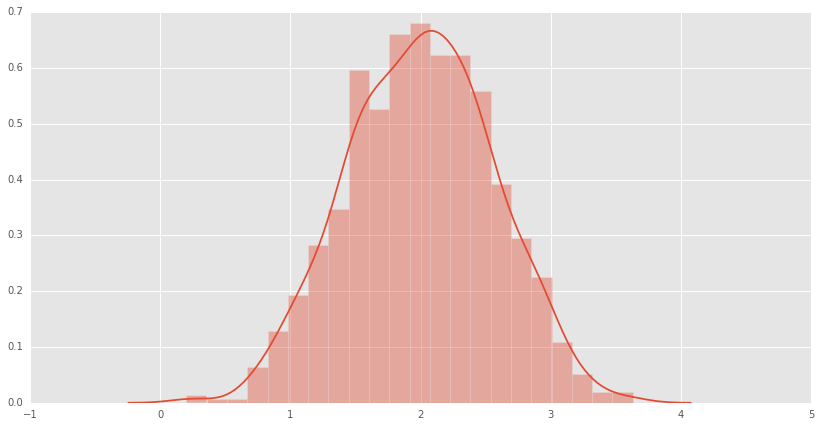

In [419]:
plt.figure(figsize=(14, 7))
sns.distplot(mean_list)

### Часть 3
В этой части вам необходимо реализовать только функцию. Перед отправкой убедитесь, что она работает корректно.

### Вопрос 1
Напишите функцию, которая принимает на вход строку. На выходе функция возвращает строку, где каждое слово развернуто.

**Пример**

Ввод: Маша купила галоши.

Вывод: ашаМ алипук ишолаг.

*То есть, как написал Артем, нужно развернуть любую сплошную последовательность букв!*

In [ ]:
    # исправим ошибку, которая возникает при неравенстве числа слов и несловестных выражений
#     if len(nolt_list) != len(reversed_words_list): 
#         if len(nolt_list) < len(reversed_words_list):
#             nolt_list.extend(['']*(len(reversed_words_list) - len(nolt_list)))
#         else:
#             reversed_words_list.extend(['']*(len(nolt_list) - len(reversed_words_list)))

In [286]:
def reverser(string):
    
    words_list = re.compile('[А-Яа-яЁёa-zA-Z]+').findall(string) # find only letter sequences
    reversed_words_list = [w[::-1] for w in words_list] # reverse each letter sequence
      
    nolt_list = re.compile('[^А-Яа-яЁёa-zA-Z]+').findall(string) # find all sequences without letters

    # создадим список с развернутыми последовательностями букв
    ## каждой последовательности букв можно поставить в соответствие идущую за ней последовательность 
    ## несловестные выражений, и наоборот; если это не так, то неполную пару можно восполнить
    ## пустым объектом '', который не меняет текст (fillvalue='')
    revw_list = [x + y for x, y in list(itertools.zip_longest(reversed_words_list, nolt_list,
                                                             fillvalue=''))]
    reversed_string = ''.join(revw_list)
    
    return reversed_string

In [295]:
def fast_reverser(string): # та же самая функция, только без создания дополнительных переменных
    
    return ''.join([x + y for x, y in list(itertools.zip_longest(
        [w[::-1] for w in re.compile('[А-Яа-яЁёa-zA-Z]+').findall(string)], 
        re.compile('[^А-Яа-яЁёa-zA-Z]+').findall(string),
        fillvalue=''))])

In [298]:
reverser('Маша купила галоши.')

'ашаМ алипук ишолаг.'

In [299]:
fast_reverser('Маша купила галоши.')

'ашаМ алипук ишолаг.'

In [300]:
reverser("Слова? Да, больше, ещё больше words! Что-то more, хотя кто-бы мог подумать")

'аволС? аД, ешьлоб, ёще ешьлоб sdrow! отЧ-от erom, ятох отк-ыб гом ьтамудоп'

In [301]:
reverser("Сло@ва? Да, больше, ещё бо#@!льше слов! Что-то ещё, 100    !!!")

'олС@ав? аД, ешьлоб, ёще об#@!ешьл волс! отЧ-от ёще, 100    !!!'

### Вопрос 2
Напишите функцию, которая проверяет, что массив отсортирован по возрастанию, либо убыванию. Она должна возращать true/false.

**Пример 1**

Ввод: [1, 2, 10, 12]

Вывод: True

**Пример 2**

Ввод: [1, 2, 10, 12, 3]

Вывод: False

**Пример 2**

Ввод: [2, 1]

Вывод: True

In [290]:
def sort_check(array):
    counter = 0
    for i in range(len(array)-1):

        if array[i] >= array[i+1]: # ascending
            counter += 1
    
    if counter == len(array) - 1:
        print('True')
        
    else:
        counter = 0
        for i in range(len(array)-1):
            
            if array[i] <= array[i+1]: # descending
                counter += 1
    
        if counter ==len(array) - 1:
            print('True')
            
        else:
            print('False')     

In [291]:
sort_check([1, 2, 10, 12])
sort_check([1, 2, 10, 12, 3])
sort_check([2, 1])

True
False
True
